## Classification with an Academic Success 

Veri setimiz, akademik yollarının erken bir aşamasında risk altında olan öğrencileri belirlemek için makine öğrenimi tekniklerini kullanarak yüksek öğrenimde akademik terk ve başarısızlığın azaltılmasına katkıda bulunmayı amaçlayan bir proje oluşturulma amacıyla toplanmıştır.

Bizde projemizde ilk başta verimizi inceleyeceğiz.38 tane sütunumuz bulunmaktadır.Tahmin etmek istediğimiz değişken öğrencilerin mezuniyet durumu olduğu için ona göre ilerleyeceğiz.Verimiz hedef değişken sütunumuz haricinde int ve float sütunlardan oluşmaktadır ve boş verimiz yoktur.Bu yüzden one-hot encoding gibi teknikler uygulamayacağız.Sütunlarımızı grafiklerle inceledikten sonra modelleme kısmına geçeceğiz.Hedef sütunumuzda birden fazla kategorimiz olduğu için bu proje bir çoklu sınıflandırma projesidir.Modelleme işleminden sonra başarı oranımızı ölçeceğiz.Classification report,confusion matrix,k fold cross validation gibi metriklerle değerlendirme yapacağız.Bizden tahmin etmemiz istenen test verisini platforma yüklemeye uygun hale getirdikten sonra projemizi tamamlayacağız.Aşağıda sütunlarla alakalı bilgiler bulunmaktadır.

**Sütunlar Hakkında Bilgi**
* id: Her bir kaydın benzersiz tanımlayıcısı.
* Marital status: Öğrencinin medeni durumu (bekar, evli vb.).
* Application mode: Başvuru yöntemi (online, yüz yüze vb.).
* Application order: Başvuru sırası.
* Course: Öğrencinin başvurduğu kurs veya program.
* Daytime/evening attendance: Öğrencinin hangi zaman diliminde ders alacağı (gündüz, akşam).
* Previous qualification: Öğrencinin daha önceki eğitim durumu veya yeterliliği.
* Previous qualification (grade): Önceki yeterlilikte alınan not veya derece.
* Nacionality: Öğrencinin milliyeti.
* Mother's qualification: Annenin eğitim durumu.
* Father's qualification: Babanın eğitim durumu.
* Mother's occupation: Annenin mesleği.
* Father's occupation: Babanın mesleği.
* Admission grade: Kabul için gereken not veya puan.
* Displaced: Öğrencinin zorunlu olarak yer değiştirme durumu.
* Educational special needs: Öğrencinin özel eğitim gereksinimleri olup olmadığı.
* Debtor: Öğrencinin borcu olup olmadığı.
* Tuition fees up to date: Öğrencinin öğrenim ücretinin güncel durumu.
* Gender: Öğrencinin cinsiyeti.
* Scholarship holder: Öğrencinin burs sahibi olup olmadığı.
* Age at enrollment: Kaydolduğu yaştaki öğrenci.
* International: Uluslararası öğrenci olup olmadığı.
* Curricular units 1st sem (credited): 1. yarıyılda kredi kazanılan dersler.
* Curricular units 1st sem (enrolled): 1. yarıyılda kaydedilen dersler.
* Curricular units 1st sem (evaluations): 1. yarıyılda değerlendirilmiş dersler.
* Curricular units 1st sem (approved): 1. yarıyılda onaylanan dersler.
* Curricular units 1st sem (grade): 1. yarıyılda alınan notlar.
* Curricular units 1st sem (without evaluations): 1. yarıyılda değerlendirilmemiş dersler.
* Curricular units 2nd sem (credited): 2. yarıyılda kredi kazanılan dersler.
* Curricular units 2nd sem (enrolled): 2. yarıyılda kaydedilen dersler.
* Curricular units 2nd sem (evaluations): 2. yarıyılda değerlendirilmiş dersler.
* Curricular units 2nd sem (approved): 2. yarıyılda onaylanan dersler.
* Curricular units 2nd sem (grade): 2. yarıyılda alınan notlar.
* Curricular units 2nd sem (without evaluations): 2. yarıyılda değerlendirilmemiş dersler.
* Unemployment rate: Öğrencinin kayıt olduğu dönemdeki işsizlik oranı.
* Inflation rate: Öğrencinin kayıt olduğu dönemdeki enflasyon oranı.
* GDP: Öğrencinin kayıt olduğu dönemdeki Gayri Safi Yurtiçi Hasıla.
* Target: Hedef değişkenimiz burada mezuniyet durumu.

<img src='academic.jpg' width=550 >

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


## Kütüphanelerimizi yüklüyoruz.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
#Dosyalarımızı okuyoruz.

## EDA - Exploratory Data Analysis - Keşifçi Veri Analizi

In [5]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [7]:
train.shape, test.shape

((76518, 38), (51012, 37))

In [10]:
train.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [11]:
test.isnull().sum()
#İkisinde de boş verimiz yok.

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [8]:
df=pd.concat([train,test])
#Dosyaları birleştiriyoruz.

In [9]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127530 entries, 0 to 51011
Data columns (total 38 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   id                                              127530 non-null  int64  
 1   Marital status                                  127530 non-null  int64  
 2   Application mode                                127530 non-null  int64  
 3   Application order                               127530 non-null  int64  
 4   Course                                          127530 non-null  int64  
 5   Daytime/evening attendance                      127530 non-null  int64  
 6   Previous qualification                          127530 non-null  int64  
 7   Previous qualification (grade)                  127530 non-null  float64
 8   Nacionality                                     127530 non-null  int64  
 9   Mother's qualification          

## Veri Görselleştirmesi

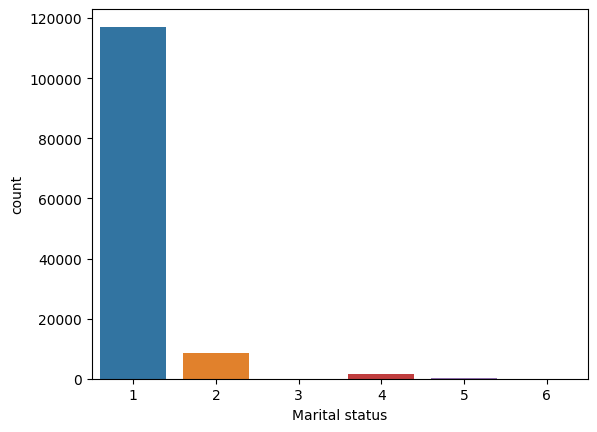

In [15]:
sns.countplot(x=df['Marital status']);

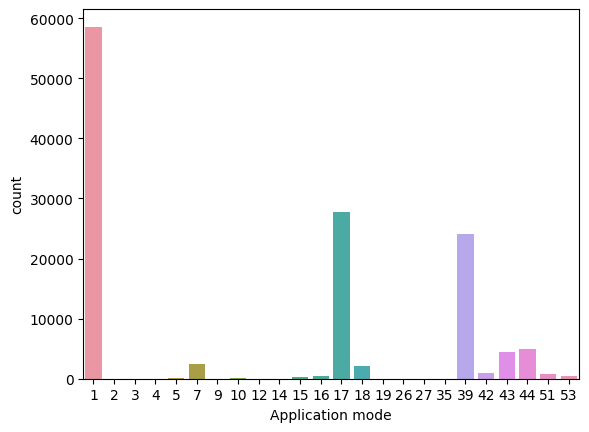

In [17]:
sns.countplot(x=df['Application mode']);

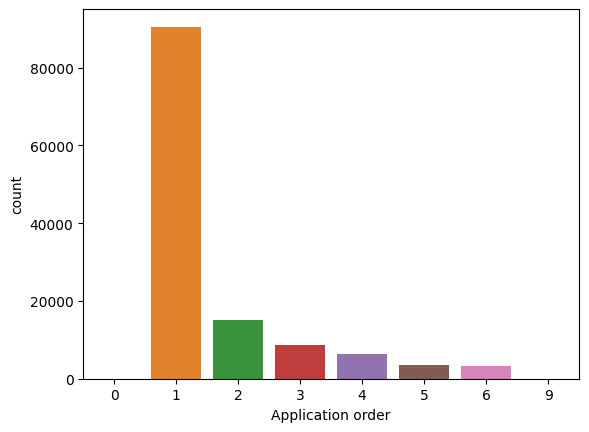

In [19]:
sns.countplot(x=df['Application order']);

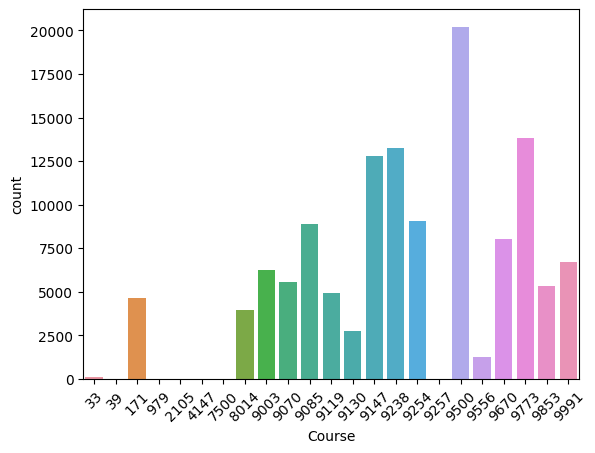

In [22]:
sns.countplot(x=df['Course'])
plt.xticks(rotation=45);

In [ ]:
sns.countplot(x=df['Course'] hue=df.Gender);

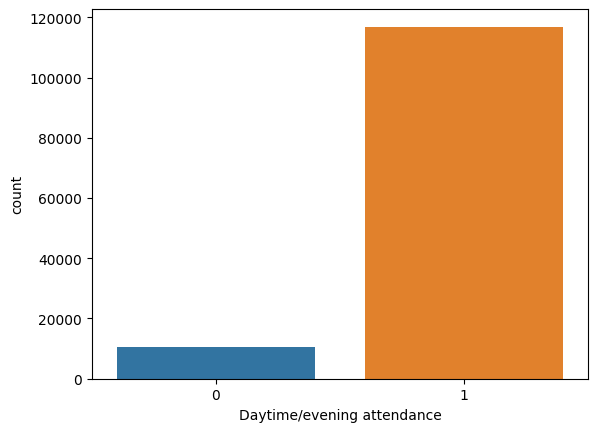

In [24]:
sns.countplot(x=df['Daytime/evening attendance']);

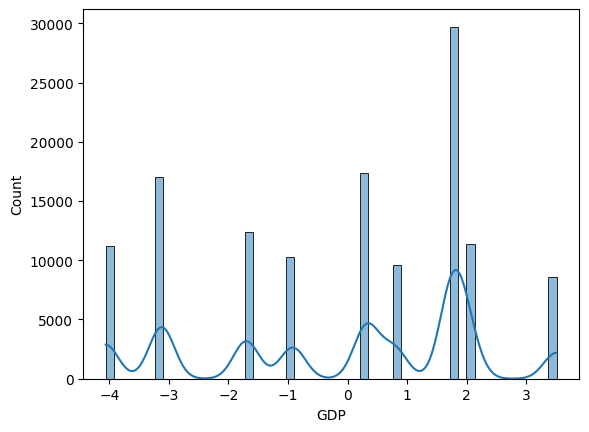

In [39]:
sns.histplot(x=df['GDP'], kde=True);

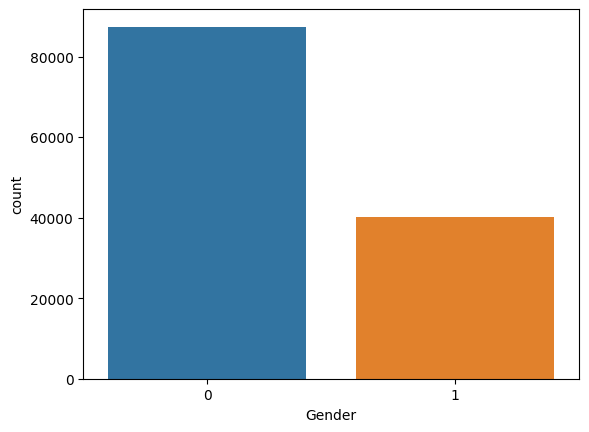

In [37]:
sns.countplot(x=df["Gender"]);

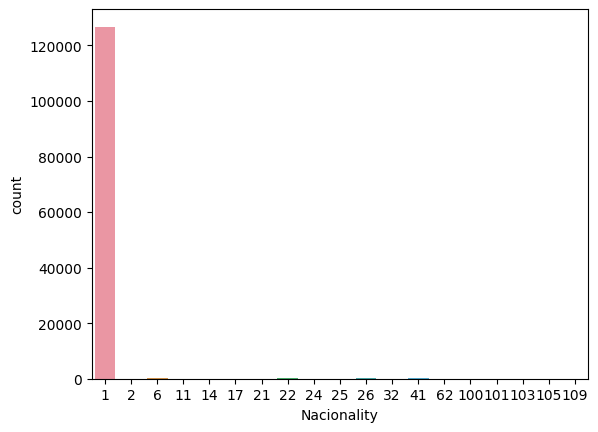

In [30]:
sns.countplot(x=df['Nacionality']);

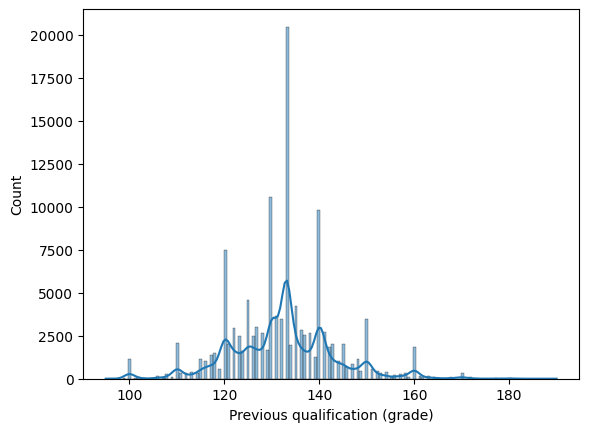

In [28]:
sns.histplot(x=df['Previous qualification (grade)'], kde=True);

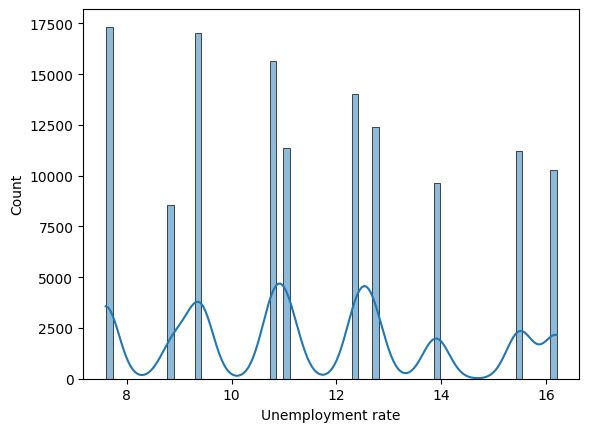

In [44]:
sns.histplot(x=df['Unemployment rate'], kde=True);

In [ ]:
sns.countplot(x=df['Target']);

## Modelleme

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [47]:
train.shape, test.shape

((76518, 38), (51012, 37))

In [48]:
train=df[:76518]
test=df[76518:]

In [49]:
x=train.drop('Target', axis=1)
y=train[['Target']]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [51]:
g=GaussianNB()
g.fit(x_train,y_train)
gtahmin=g.predict(x_test)
accuracy_score(gtahmin,y_test)

0.7640486147412441

In [52]:
confusion_matrix(gtahmin,y_test)

array([[3624,  234,  180],
       [ 940, 1591,  601],
       [ 464, 1192, 6478]])

In [55]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

     Dropout       0.72      0.90      0.80      4038
    Enrolled       0.53      0.51      0.52      3132
    Graduate       0.89      0.80      0.84      8134

    accuracy                           0.76     15304
   macro avg       0.71      0.73      0.72     15304
weighted avg       0.77      0.76      0.76     15304



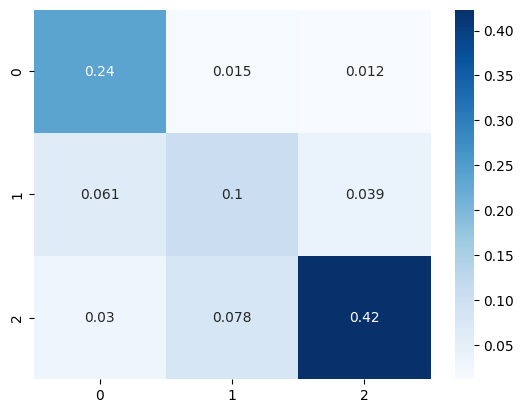

In [54]:
cm = confusion_matrix(gtahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues');

In [56]:
#K-Fold Cross Validation
x=train.drop('Target', axis=1)
y=train[['Target']]


model=GaussianNB()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.76404861 0.76751176 0.75738369 0.7610926  0.77141737]
Mean Accuracy: 0.764290806455376


In [62]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b, knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB','K-Nearest Neighbors','Decision Tree',
                  'Random Forest','AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [63]:
algo_test(x, y)

,Accuracy,Precision,Recall,F1-score
Gradient Boosting,0.830110,0.828737,0.830110,0.828053
Random Forest,0.827169,0.826000,0.827169,0.825177
AdaBoost,0.819459,0.818390,0.819459,0.817463
Logistic Regression,0.770060,0.759076,0.770060,0.754968
Decision Tree,0.739415,0.740577,0.739415,0.739965
BernoulliNB,0.709553,0.706579,0.709553,0.695218
MLP Classifier,0.642054,0.687840,0.642054,0.588450
K-Nearest Neighbors,0.522216,0.511310,0.522216,0.515892
SVM,0.492420,0.457310,0.492420,0.355043


In [65]:
test1=test.drop('Target',axis=1)

In [69]:
gbc = GradientBoostingClassifier()
gbc.fit(x,y)
pred=gbc.predict(test1)

In [70]:
pred1=pd.DataFrame()
pred1['id']=test['id']
pred1['Target']=pred

In [71]:
pred1

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [72]:
pred1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51012 entries, 0 to 51011
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51012 non-null  int64 
 1   Target  51012 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [73]:
pred1.to_csv('submission_academic.csv', index=False)

## Özet

Verilerimizi inceledik,boş verimiz yoktu.Train ve test verilerini ayrı ayrı inceledikten sonra ikisini birleştirdik.Grafiklerle görselleştirmeler yaptık.Modelleme kısmına geldiğimizde birleştirdiğimiz yerden verimizi ikiye ayırdık.%80 eğitim,%20 test ile modelimizi eğittik.Confusion matrix,classification report,k fold cross validation gibi metriklerle başarı oranımızı inceledik.Classification algoritmamızı çağırdık.En yüksek çıkan model Gradient Boosting Classifier olduğu için onunla test verimizi tahmin ettik.Düzenledik,yüklemeye uygun hale getirdik.Kaggle platformunda tahminde bulunduk.Sonunda projemizi tamamlamış olduk.